#**TASK1 - Prediction using Supervised ML**<br>
##Name: Apeksha Kamath<br>
Task description - Predict the percentage of a student depending upon the number of hours of study. <br>
Dataset used - http://bit.ly/w-data

In [ ]:
#Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 
from sklearn import metrics  

In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#statistical description of dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.shape

(25, 2)

There are 25 rows and 2 columns in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are no null values in the dataset provided

Visualisation

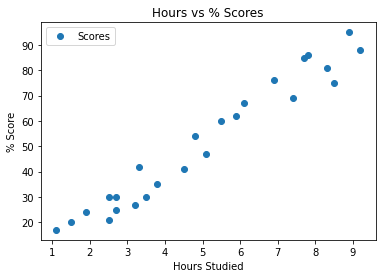

In [ ]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs % Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('% Score')  
plt.show()

From the plot we can infer that there is a positive linear relationship between no. of study hours and % score

Data Preprocessing

In [ ]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  #target variable

Splitting the data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Training the model

In [ ]:
#Applying the Linear Regression Model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [ ]:
#The coefficient and intercept will be used for fitting the regression line
print('The coefficient is ', regressor.coef_[0])
print('The Intercept is ',regressor.intercept_)

The coefficient is  9.91065648064224
The Intercept is  2.018160041434662


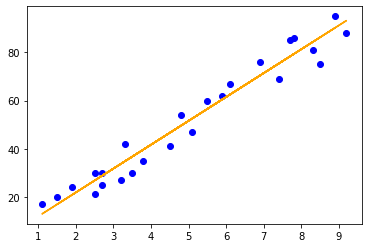

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_      # y = mx + c      

# Plotting for the test data
plt.scatter(X, y, color = 'blue')
plt.plot(X, line, color = 'orange');
plt.show()

The plot shows the best fit line that best expresses the relationship between the points

Prediction on test data

In [ ]:
y_pred = regressor.predict(X_test) # Predicting the scores

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
print('Training Accuracy is : ', round(regressor.score(X_train, y_train)*100,2))
print('Testing Accuracy is : ', round(regressor.score(X_test, y_test)*100,2))

Training Accuracy is :  95.16
Testing Accuracy is :  94.55


Prediction on given test data

In [ ]:
print('The predicted score for a student who studies 9.25 hrs/day is: {}'.format(regressor.predict([[9.25]])))

The predicted score for a student who studies 9.25 hrs/day is: [93.69173249]


Model evaluation

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
